# Climate example

## Example

We will look at a dataset containing carbon emissions, GDP and population for 164 countries (data from 2018).

These data are adapted from a dataset downloaded from <a href="https://ourworldindata.org/">Our World in Data</a>, a fabulous Oxford-based organization that provides datasets and visualizations addressing global issues.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

### Load and inspect the data

Load the data from the file CO2vGDP.csv

In [2]:
CO2vGDP = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/CO2vGDP.csv')
display(CO2vGDP)

,Country,CO2,GDP,population
0,Afghanistan,0.2245,1934.555054,36686788
1,Albania,1.6422,11104.166020,2877019
2,Algeria,3.8241,14228.025390,41927008
3,Angola,0.7912,7771.441895,31273538
4,Argentina,4.0824,18556.382810,44413592
...,...,...,...,...
159,Venezuela,4.1602,10709.950200,29825652
160,Vietnam,2.3415,6814.142090,94914328
161,Yemen,0.3503,2284.889893,30790514
162,Zambia,0.4215,3534.033691,17835898


<b>Aside</b> - 
I notice that the GDP values contain loads of decimal places which makes them hard to read. 
Let's just round those:

In [3]:
CO2vGDP['GDP']=CO2vGDP['GDP'].round()
display(CO2vGDP)

,Country,CO2,GDP,population
0,Afghanistan,0.2245,1935.0,36686788
1,Albania,1.6422,11104.0,2877019
2,Algeria,3.8241,14228.0,41927008
3,Angola,0.7912,7771.0,31273538
4,Argentina,4.0824,18556.0,44413592
...,...,...,...,...
159,Venezuela,4.1602,10710.0,29825652
160,Vietnam,2.3415,6814.0,94914328
161,Yemen,0.3503,2285.0,30790514
162,Zambia,0.4215,3534.0,17835898


It is easier to comapre the values now as the larger GDPs actually take up more space!

### Plot the data

Let's plot the data. A scatterplot is a good choice for bivariate data such as these.

Text(0, 0.5, 'CO2 emissions: tonnes/person/year')

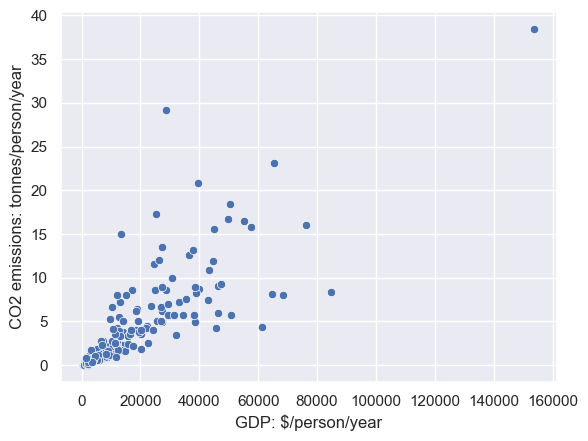

In [4]:
sns.scatterplot(data=CO2vGDP, x='GDP', y='CO2')
plt.xlabel('GDP: $/person/year')
plt.ylabel('CO2 emissions: tonnes/person/year')

Let's find the UK on that graph:

Text(0, 0.5, 'CO2 emissions: tonnes/person/year')

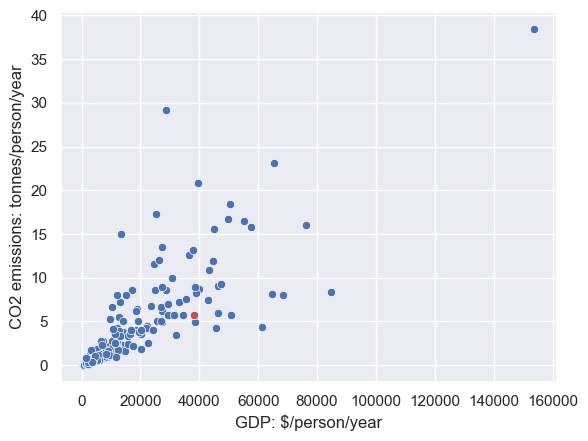

In [5]:
sns.scatterplot(data=CO2vGDP, x='GDP', y='CO2')
sns.scatterplot(data=CO2vGDP[CO2vGDP['Country']=='United Kingdom'], x='GDP', y='CO2',color='r') # see what I did there to plot the UK in red?
plt.xlabel('GDP: $/person/year')
plt.ylabel('CO2 emissions: tonnes/person/year')

### Calculate the correlation

We can calculate the correlation using the built in function <tt>pandas.df.corr()</tt>

In [6]:
CO2vGDP.corr()

,CO2,GDP,population
CO2,1.000000,0.795215,-0.003745
GDP,0.795215,1.000000,-0.054502
population,-0.003745,-0.054502,1.000000


Humph, population was included in my correlation matrix, which I didn't really want. 

The function <tt>pandas.df.corr()</tt> returns the matrix of correlations between all pairs of variables in your dataframe. 

This isn't a big problem in the current case, but if you had a big dataframe with many irrelevant columns, it would be an issue, because we don't want the reader to have to search through a huge correlation matrix to find the correlation we are interested in.

We have two options to avoid this - one is to create a new dataframe with only the columns you want to correlate, like this:

In [7]:
CO2vGDP_reduced = CO2vGDP[['CO2','GDP']] # new dataframe has only columns 'CO2' and 'GDP'
CO2vGDP_reduced.corr()

,CO2,GDP
CO2,1.000000,0.795215
GDP,0.795215,1.000000


The other is to correlate just the two columns we want, rather than getting the whole correlation matrix:

In [8]:
CO2vGDP['CO2'].corr(CO2vGDP['GDP'])

0.7952149355025787

### Outliers

The correlation between GDP and C02 looks quite high, 0.79.

However, looking at our scatterplot, I can see a problem - there is one bad outlier with very high GDP and high CO2 emissions.

Any guesses what this country is? 

We can find out by sorting the dataframe by GDP:

In [9]:
CO2vGDP.sort_values(by='GDP', ascending=False) # sort in descending order to put the richest country at the top

,Country,CO2,GDP,population
122,Qatar,38.4397,153764.0,2766743
112,Norway,8.3307,84580.0,5312321
154,United Arab Emirates,16.0112,76398.0,9140172
133,Singapore,7.9898,68402.0,5814543
79,Kuwait,23.1008,65521.0,4317190
...,...,...,...,...
108,Niger,0.0830,965.0,22577060
39,Democratic Republic of Congo,0.0331,859.0,87087352
85,Liberia,0.2252,818.0,4889396
21,Burundi,0.0608,651.0,11493476


It's Qatar - maybe not what you expected?

### Remove outlier

Let's exclude Qatar from our dataset and re-calculate the correlation.

We erase the values for Qatar data values for CO2 and GDP for Qatar to <tt>Nan</tt> but in this case, since they are not misrecorded but just unusual values, let's not do that, as we don't want to hide the data point.

Instead we conduct the correlation on the dataframe excluding Qatar:

In [10]:
CO2vGDP[CO2vGDP['Country']!='Qatar'].corr()

,CO2,GDP,population
CO2,1.000000,0.732445,0.007057
GDP,0.732445,1.000000,-0.050659
population,0.007057,-0.050659,1.000000


Hm, the correlation went down from $r$=0.79 to $r$=0.073 - lower but still strong

Here's a plot of the data with Qatar excluded

Text(0, 0.5, 'CO2 emissions: tonnes/person/year')

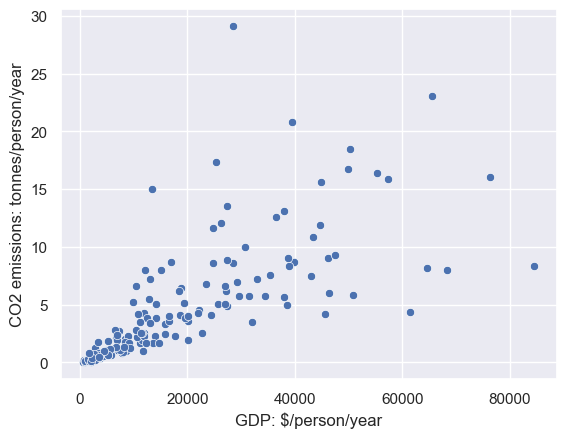

In [11]:
sns.scatterplot(data=CO2vGDP[CO2vGDP['Country']!='Qatar'], x='GDP', y='CO2')
plt.xlabel('GDP: $/person/year')
plt.ylabel('CO2 emissions: tonnes/person/year')

We no longer have an obvious outlier, but we do have a problem, called heteroscedasticity

Heteroscedasticty is when the variance of the data in $y$ depends on the value in $x$. In this case, CO2 emissions are more variable for high income countries (which can be high- or low poluting) compared to low income countries

This property violates the assumptions of Pearson's correlation coefficient, so for these dataset we would be better off using Spearman's rank correlation coefficient, as explored in the next section.